<a href="https://colab.research.google.com/github/sunnysavita10/AI-Agents/blob/main/sentencewindowsearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### HYDE(Hypothetical Document Embeddings)

### Architecture
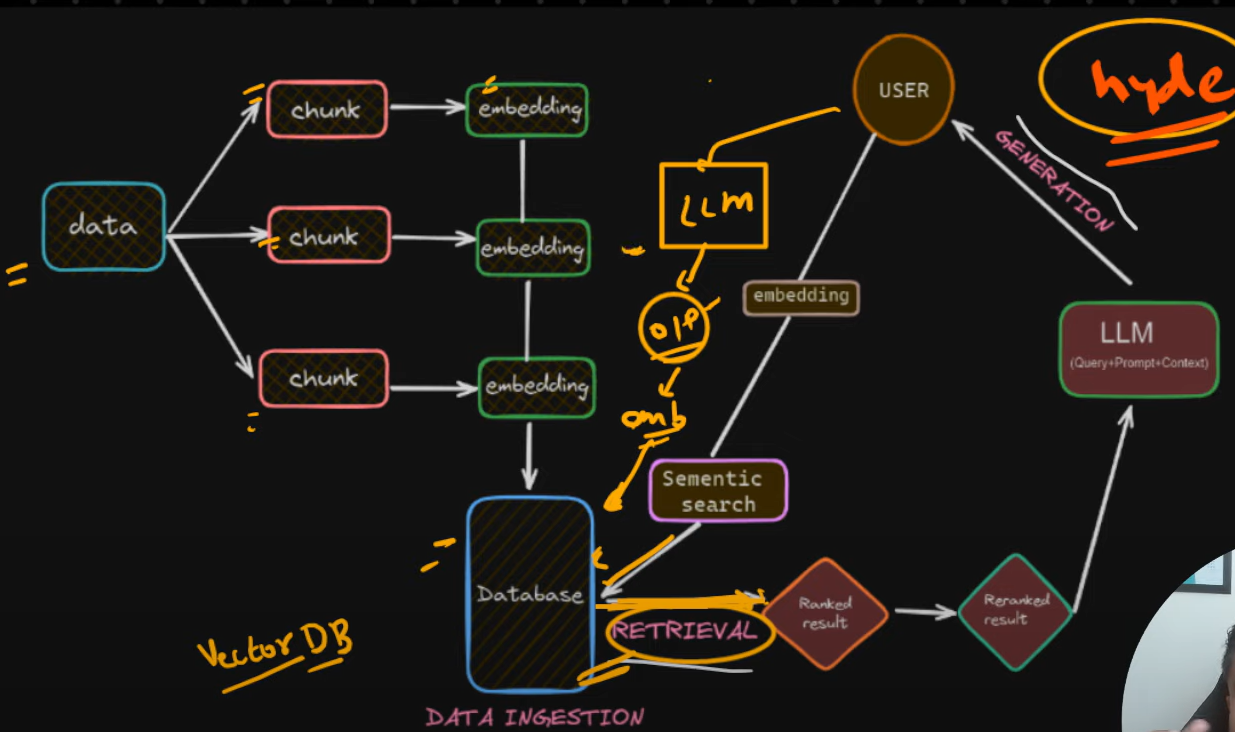

### Step1: Loading the LLM and the Embedding Models.

In [ ]:
!pip install langchain_google_genai
!pip install langchain_community
!pip install chromadb

In [ ]:
import warning
#Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [ ]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:
# Create a ChatGoogleGenerativeAI Object and convert system message to human-readable formate.
llm = ChatGoogleGenerativeAI(model="gemini-pro", convert_system_message_to_human=True)

# create a GoogleGenerativeAIEmbeddings object for embedding our Prompts and documents
Embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

### Step2: Data Loading

In [ ]:
from langchain_community.document_loaders import WebBaseLoader
#create a WebBaseLoader object with the URL of the blog post to load.
loader = WebBaseLoader("https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/")

# Load the blogpost and store the documents in the 'docs' variable.
docs = loader.load()
print(docs[0])

### Step3: Data Splitting/Creating Chunks

In [ ]:
from langchain.text_splitter import RevursiveCharacterTextSplitter
# chunk size and overlap
textPsplitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=50)
# store the resulting splits in the 'splits' variable
splits = text_splitter.split_documents(docs)

### Step4: Storing Documents

In [ ]:
from langchian_community.vectorstores import Chroma
# passing the hyde embeddings to create and store embeddings
vectore = Chroma.from_documents(docuemnts = splits, collection_name = 'my-collection', embedding = Embeddings)
# Creating Retriever
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k":4})

### Step5: Creating a Prompt Template for Generating HyDE

In [ ]:
from langchain.prompts import ChatPromptTemplate
# Creating the Prompt Template
template = """For the given question try to generate a hypothetical answer\ Only generate the answer and nothing else:
Question: {question}
"""

In [ ]:
Prompt = ChatPromptTemplate.from_template(template)
query = Prompt.format(question = 'What are different Chain of Thought(CoT) Prompting?')

In [ ]:
hypothetical_answer = llm.invoke(query).content
print(hypothetical_answer)

### Step6: Retrieval with Hypothetical answer/document

In [ ]:
# retrieval with hypothetical answer/document
similar_docs1 = retriever.get_relevant_documents(hypothetical_answer)

for doc in similar_docs1:
  print(doc.page_content)
  print()

### Step7: Getting the Relevant Documents

In [ ]:
# not passing hypothetical question generated by llm to check relevant answer or not
similar_docs2 = retriever.get_relevant_documents('What are different Chain of Thought(CoT) Prompting?')

for doc in simmilar_docs2:
   print(doc.page_content)
   print()

In [ ]:
template = """Answer the following question in detailed based on this context:
{context}
Question: {question}
"""

Prompt = ChatPromptTemplate.from_template(template)

In [ ]:
def format_docs(docs):
   return "\n\n".join(doc.page_content for doc in docs)

In [ ]:
formated_docs1 = format_docs(similar_docs1)

In [ ]:
formated_docs2 = format_docs(similar_docs2)

In [ ]:
query_Prompt1 = Prompt.format(context=formatted_docs1,
question="What are different Chain of Thought(Cot) Prompting?")
print(query_Prompt1)

In [ ]:
query_Prompt2 = Prompt.format(context=formatted_docs2,
question="What are different Chain of Thought(Cot) Prompting?")
print(query_Prompt2)

In [ ]:
response1 = llm.invoke(query_Prompt1)
print(response1.content)

In [ ]:
response2 = llm.invoke(query_Prompt2)
print(response2.content)

In [ ]:
#### Auto Merging Retriever/Hierarchical Retriever

it is similar to the Child_to_Parent_Retrieval concept

#### Auto Merging Retriever/Hierarchical Retriever
it is similar to the Child_to_Parent_Retrieval concept